In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import linecache

In [27]:
# set data path
basepath = "/home/emily/Desktop/isamoa_data/"
path = basepath + "good5_sb32n16t_d26min66_mpi_1458983"

jobid = path[-7:]
filename = path + '/' + jobid + '.log'
print(filename)

/home/emily/Desktop/isamoa_data/good5_sb32n16t_d26min66_mpi_1458983/1458983.log


# Process Data

In [28]:
phase_stats_markers = []
nranks = []
ncells = []
nelaps = []

mcells = []
msteps = []

####################
# impi exec times
####################

f = open(filename, 'r')
for i, line in enumerate(f,1):
    
    # find all "phase statistics" line numbers
    if "Phase statistics:" in line:
        phase_stats_markers = phase_stats_markers + [i]
        
    # Get nranks & ncells vs. time
    if ">>>" in line:
        larr = line.split()
        try:
            ranks = int(larr[-1])
            cells = int(larr[-3][:-1])
            elaps = float(larr[-5][:-1])
        except:
            pass
        else: 
            nranks = nranks + [ranks]
            nelaps = nelaps + [elaps]
            ncells = ncells + [cells * ranks]   
            
        # Get mcells vs. time steps
        if "time step:" in line:
            idx = larr.index('step:')
            msteps = msteps + [int(larr[idx+1][:-1])]
            idx = larr.index('cells:')
            mcells = mcells + [cells * ranks]      
f.close()


# ####################
# # Phase statistics
# ####################

# ps_init_time = 0.0
# ps_eq_time = 0.0
# ps_tsu_comp_time = 0.0
# ps_tsu_adap_time = 0.0
# ps_total_time = 0.0

# for marker in phase_stats_markers:
    
#     # ranks
#     line = linecache.getline(filename, marker+2)
#     larr = line.split()
#     ps_ranks = int(larr[-1])
    
#     # Init time
#     line = linecache.getline(filename, marker+3)
#     larr = line.split()
#     idx = larr.index("time:")
#     ps_init_time = ps_init_time + float(larr[idx+1])/float(ps_ranks)
    
#     # Earthquake time
#     line = linecache.getline(filename, marker+4)
#     larr = line.split()
#     idx = larr.index("time:")
#     ps_eq_time = ps_eq_time + float(larr[idx+1])/float(ps_ranks)
    
#     # Tsunami compute time
#     line = linecache.getline(filename, marker+5)
#     larr = line.split()
#     idx = larr.index("time:")
#     ps_tsu_comp_time = ps_tsu_comp_time + float(larr[idx+1])/float(ps_ranks)
    
#     # Tsunami adaption time
#     line = linecache.getline(filename, marker+6)
#     larr = line.split()
#     idx = larr.index("time:")
#     ps_tsu_adap_time = ps_tsu_adap_time + float(larr[idx+1])/float(ps_ranks)
    
#     # Total time
#     line = linecache.getline(filename, marker+13)
#     larr = line.split()
#     idx = larr.index("time:")
#     ps_total_time = ps_total_time + float(larr[idx+1]) 
    



# # Cells vs. Time step

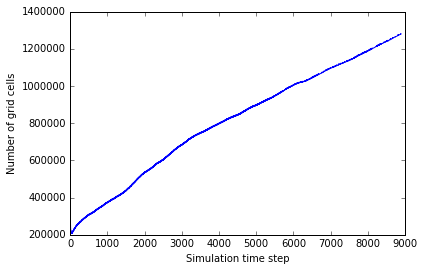

In [29]:
fig = plt.figure()
ax = fig.gca()
ax.plot(msteps, mcells)
ax.set_xlabel("Simulation time step")
ax.set_ylabel("Number of grid cells")
ax.set_ylim()

fig.savefig(path+"/cells_vs_steps.pdf",bbox_inches="tight")

# # Ranks vs. Exec Time

CPU-sec = 102512.07421952
CPU-hour = 28.47557617208889


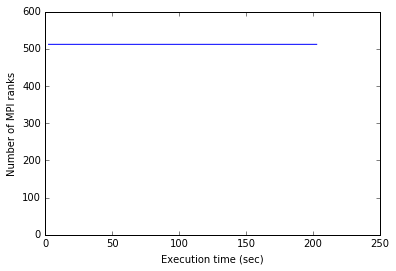

In [31]:
fig = plt.figure()
ax = fig.gca()
ax.plot(nelaps, nranks)
ax.set_xlabel("Execution time (sec)")
ax.set_ylabel("Number of MPI ranks")
ax.set_ylim(0, 600)

area = np.trapz(nranks, x=nelaps)
print("CPU-sec = {}".format(area))
print("CPU-hour = {}".format(area / 3600))

